# Project Business Statistics: E-news Express


####Business Context

The advent of e-news, or electronic news, portals has offered us a great opportunity to quickly get updates on the day-to-day events occurring globally. The information on these portals is retrieved electronically from online databases, processed using a variety of software, and then transmitted to the users. There are multiple advantages of transmitting new electronically, like faster access to the content and the ability to utilize different technologies such as audio, graphics, video, and other interactive elements that are either not being used or aren’t common yet in traditional newspapers.

E-news Express, an online news portal, aims to expand its business by acquiring new subscribers. With every visitor to the website taking certain actions based on their interest, the company plans to analyze these actions to understand user interests and determine how to drive better engagement.

The executives at E-news Express are of the opinion that there has been a decline in new monthly subscribers compared to the past year because the current webpage is not designed well enough in terms of the outline & recommended content to keep customers engaged long enough to make a decision to subscribe.

####Objective

The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups.

The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1. Do the users spend more time on the new landing page than on the existing landing page?

2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

3. Does the converted status depend on the preferred language?

4. Is the time spent on the new page the same for the different language users?

####Data Dictionary

The data contains information regarding the interaction of users in both groups with the two versions of the landing page.

- user_id - Unique user ID of the person visiting the website

- group - Whether the user belongs to the first group (control) or the second group (treatment)

- landing_page - Whether the landing page is new or old

- time_spent_on_the_page - Time (in minutes) spent by the user on the landing page

- converted - Whether the user gets converted to a subscriber of the news portal or not

- language_preferred - Language chosen by the user to view the landing page

## Define Problem Statement and Objectives

## Import all the necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scipy==1.11.4 -q --user
!pip install numpy==1.26.0 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 scipy==1.11.4 -q --user
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from scipy import stats
from scipy.stats import ttest_ind
!pip install some-package --no-warn-script-location


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

## Reading the Data into a DataFrame

In [ ]:
# Import from drive
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the csv file
df = pd.read_csv('/content/drive/MyDrive/project 2/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

###Data Overview

####Viewing the first 5 rows of the dataset

In [ ]:
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


####Viewing the last 5 rows of the dataset

In [ ]:
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


####Checking the shape of the dataset

In [ ]:
print(df.shape)

(100, 6)


####Getting the data type and the statistical summary for the variables

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


####Check for missing and unique values

In [ ]:
df.isnull().sum()

,0
user_id,0
group,0
landing_page,0
time_spent_on_the_page,0
converted,0
language_preferred,0


In [ ]:
df.nunique()

,0
user_id,100
group,2
landing_page,2
time_spent_on_the_page,94
converted,2
language_preferred,3


The amount of possible answers on each category

####Check for duplicates

In [ ]:
df.duplicated().sum()

0

### Univariate Analysis

####Group

In [ ]:
df['group'].value_counts()

,count
group,
control,50
treatment,50


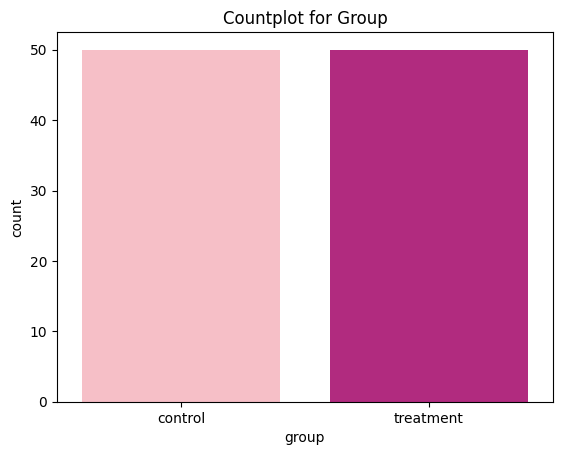

In [ ]:
my_colors = sns.color_palette(["#FFB6C1", "#C71585"])
sns.countplot(x=df['group'], palette=my_colors)
plt.title('Countplot for Group');

####Landing page

In [ ]:
df['landing_page'].value_counts()

,count
landing_page,
old,50
new,50


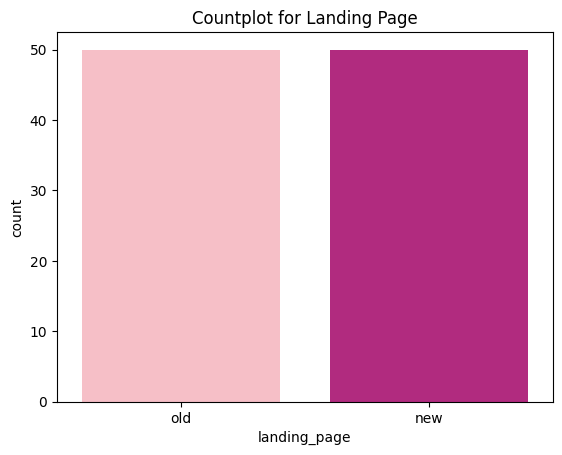

In [ ]:
my_colors = sns.color_palette(["#FFB6C1", "#C71585"])
sns.countplot(x=df['landing_page'], palette=my_colors)
plt.title('Countplot for Landing Page');

####Time spent on the page

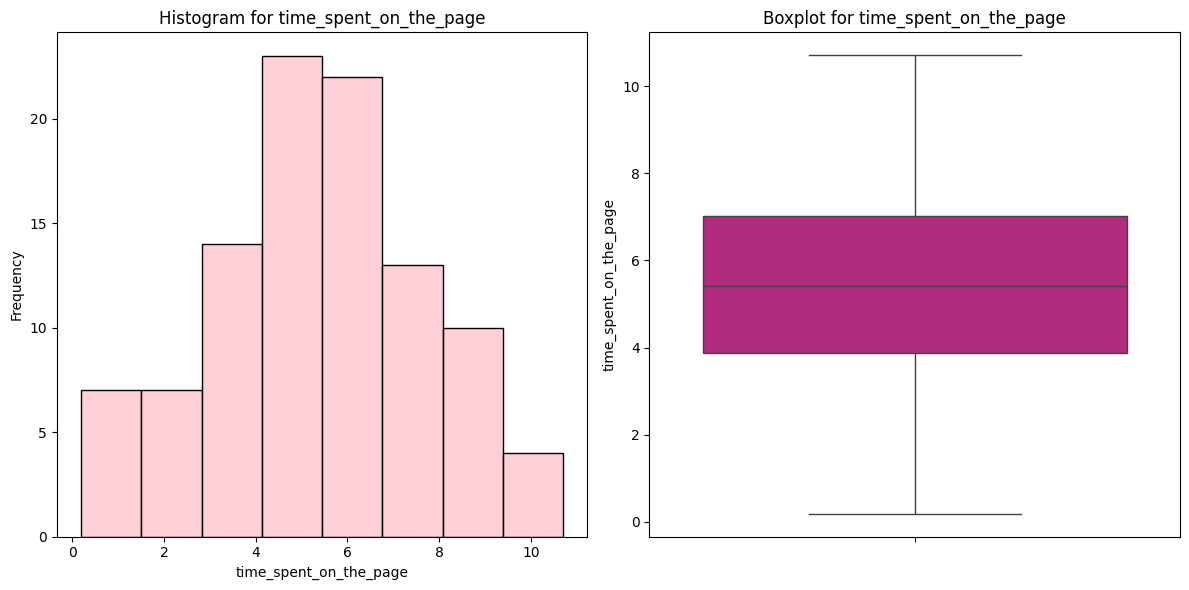

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for the subplot on the left side
sns.histplot(df['time_spent_on_the_page'], color='pink',  ax=axes[0])
axes[0].set_title('Histogram for {}'.format('time_spent_on_the_page'))
axes[0].set_xlabel('time_spent_on_the_page')
axes[0].set_ylabel('Frequency')

# Boxplot for the subplot on the right side
sns.boxplot(y=df['time_spent_on_the_page'], color='#C71585', ax=axes[1])
axes[1].set_title('Boxplot for {}'.format('time_spent_on_the_page'))
#axes[1].set_xlabel('Experiment')
axes[1].set_ylabel('time_spent_on_the_page')

# Adjust the space in between
plt.tight_layout()

plt.show()

####Converted

In [ ]:
df['converted'].value_counts()

,count
converted,
yes,54
no,46


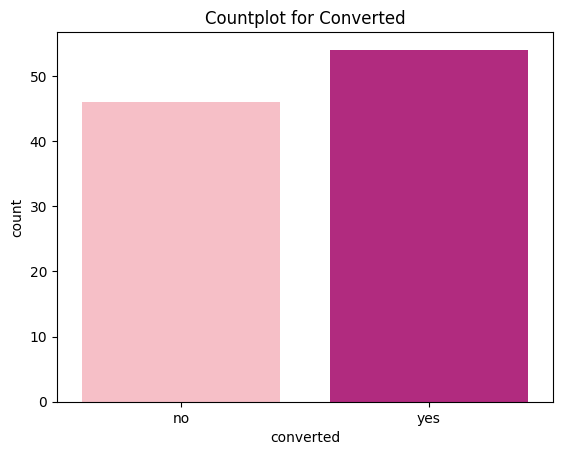

In [ ]:
my_colors = sns.color_palette(["#FFB6C1", "#C71585"])
sns.countplot(x=df['converted'], palette=my_colors)
plt.title('Countplot for Converted');

####Language prefered

In [ ]:
df['language_preferred'].value_counts()

,count
language_preferred,
Spanish,34
French,34
English,32


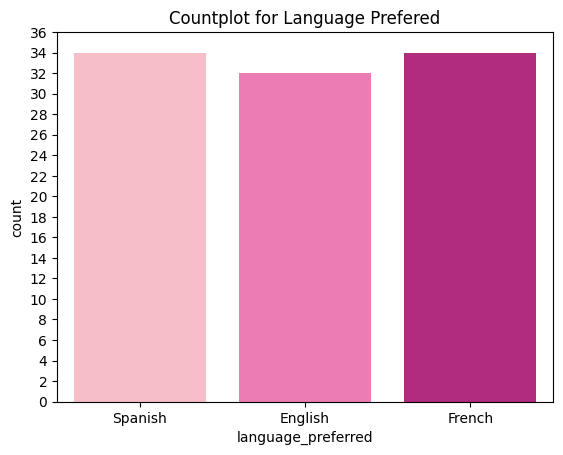

In [ ]:
#my_colors = sns.color_palette(['#FFB6C1', '#DB7093',  '#FFAEB9'])
my_colors = sns.color_palette(["#FFB6C1", "#FF69B4", "#C71585"])
sns.countplot(x=df['language_preferred'], palette=my_colors)
plt.xticks(rotation=0)
plt.yticks(range(0, 37, 2))
plt.title('Countplot for Language Prefered');

### Bivariate Analysis

####Time spent on the page vs Group

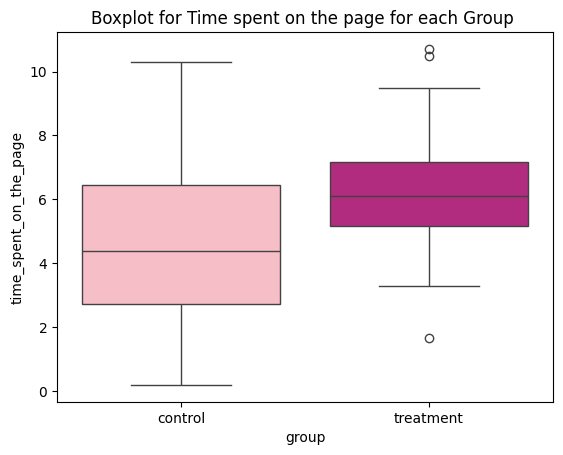

In [ ]:
my_colors = sns.color_palette(["#FFB6C1", "#C71585"])
sns.boxplot(x='group', y='time_spent_on_the_page',palette=my_colors, data=df);
plt.title('Boxplot for Time spent on the page for each Group ');
plt.show();

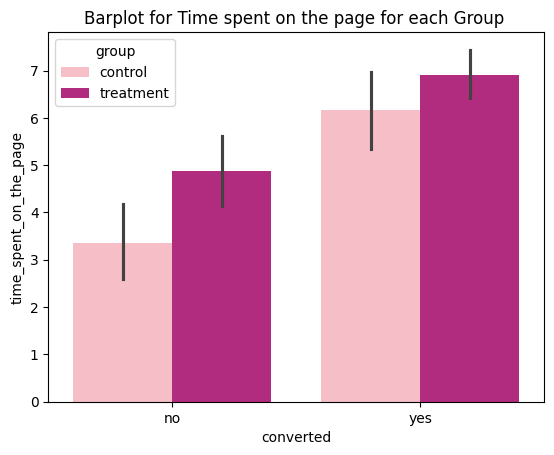

In [ ]:
my_colors = sns.color_palette(["#FFB6C1", "#C71585"])
sns.barplot(x='converted', y='time_spent_on_the_page', hue='group', data=df, palette=my_colors)
plt.title('Barplot for Time spent on the page for each Group ')
plt.show()

####Time spent on the page vs Landing Page

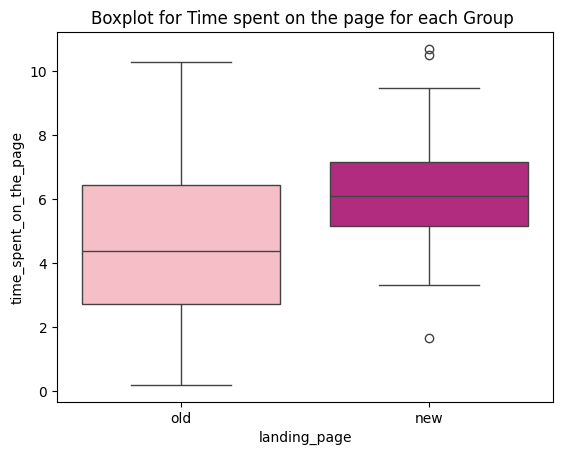

In [ ]:
my_colors = sns.color_palette(["#FFB6C1", "#C71585"])
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df, palette=my_colors)
plt.title('Boxplot for Time spent on the page for each Group ')
plt.show()

####Time spent on the page vs Converted

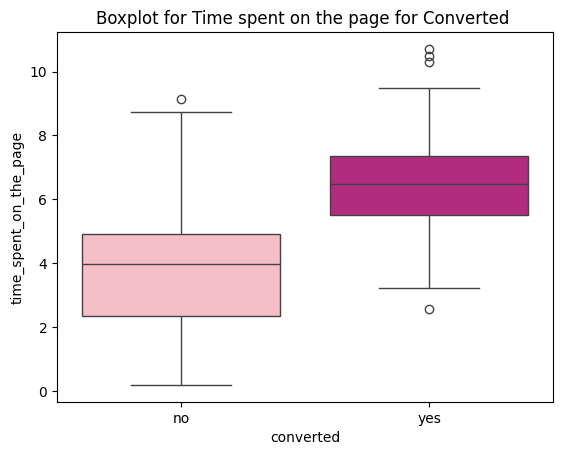

In [ ]:
my_colors = sns.color_palette(["#FFB6C1", "#C71585"])
sns.boxplot(x='converted', y='time_spent_on_the_page', data=df, palette=my_colors)
plt.title('Boxplot for Time spent on the page for Converted ')
plt.show()

#### Time spent on the page vs Language Prefered

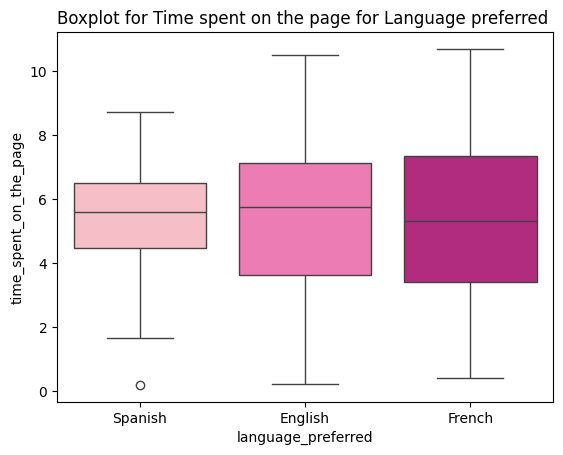

In [ ]:
#my_colors = sns.color_palette(["#FFB6C1", "#C71585"])
my_colors = sns.color_palette(["#FFB6C1", "#FF69B4", "#C71585"])
sns.boxplot(x='language_preferred', y='time_spent_on_the_page', data=df, palette=my_colors)
plt.title('Boxplot for Time spent on the page for Language preferred ')
plt.show()

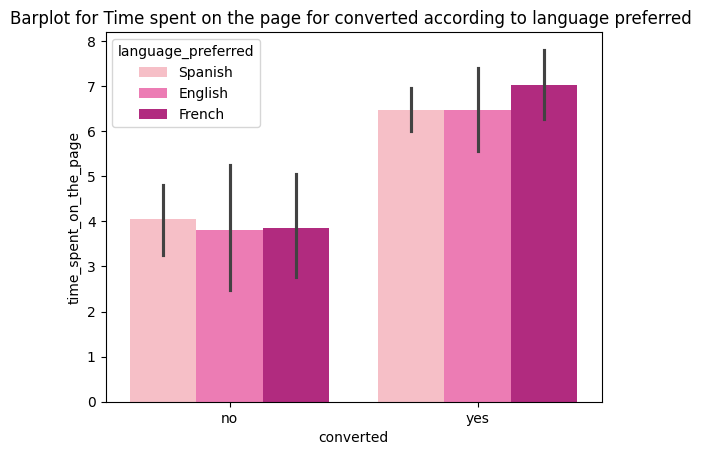

In [ ]:
my_colors = sns.color_palette(["#FFB6C1", "#FF69B4", "#C71585"])
sns.barplot(x='converted', y='time_spent_on_the_page', hue='language_preferred', data=df, palette=my_colors)
plt.title('Barplot for Time spent on the page for converted according to language preferred ')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

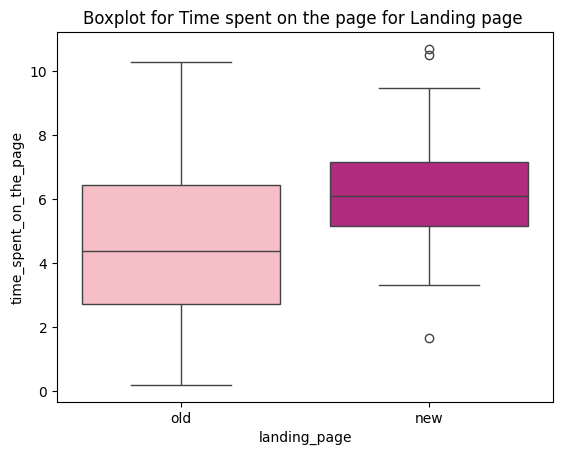

In [ ]:
my_colors = sns.color_palette(["#FFB6C1", "#C71585"])
sns.boxplot(x='landing_page', y='time_spent_on_the_page', data=df, palette=my_colors)
plt.title('Boxplot for Time spent on the page for Landing page ')
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0: \mu_1 = \mu_2$ \\
$H_a: \mu_1 < \mu_2$

### Step 2: Select Appropriate test

Two independend sample t-test

### Step 3: Decide the significance level

$\alpha = 0.05$

### Step 4: Collect and prepare data

In [ ]:
time_spent_oldpage=df[df['landing_page']=='old']['time_spent_on_the_page']
time_spent_newpage=df[df['landing_page']=='new']['time_spent_on_the_page']

print('Time spent on the OLD and NEW page have a sample standard deviation of',round(time_spent_newpage.std(),2),'and', round(time_spent_oldpage.std(),2),'respectively')

Time spent on the OLD and NEW page have a sample standard deviation of 1.82 and 2.58 respectively


### Step 5: Calculate the p-value

In [ ]:
test_stat, p_value = ttest_ind(time_spent_oldpage, time_spent_newpage, equal_var=False, alternative="less")
print('The p-value is', round(p_value,5))

The p-value is 0.00014


### Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print("p-value is", round(p_value,5) ,"(less than 0.05) which means the null hypothesis is rejected.")
else:
    print("p-value is", round(p_value,5), "(greater than 0.05) which means we Fail to reject the null hypothesis.")

p-value is 0.00014 (less than 0.05) which means the null hypothesis is rejected.


### Step 7:  Draw inference

There's enough evidence to say that the users are spending more time on the new page than in the old one. We can be more than 99% sure of this conclusion.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

###Perform Visual Analysis

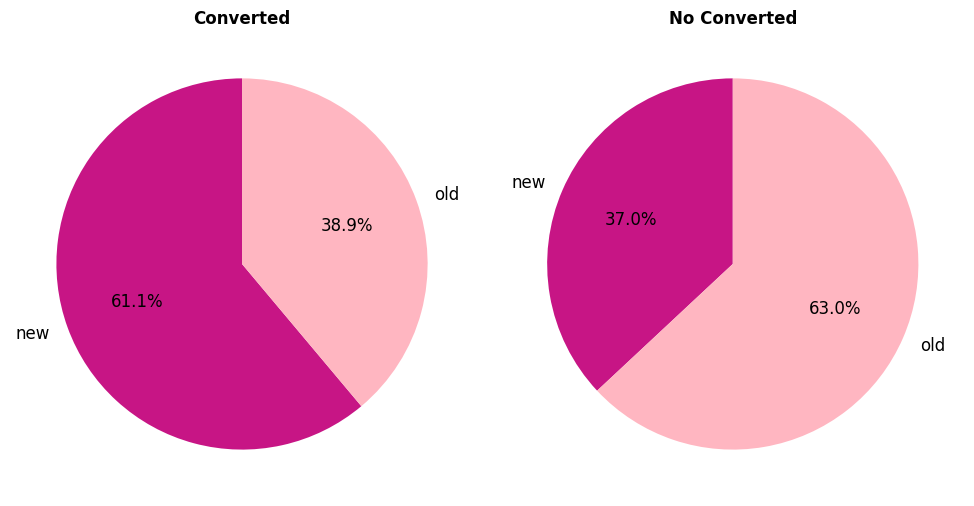

In [ ]:
cross_tab = pd.crosstab(df['converted'], df['landing_page'])

# Subplots para for the graphs
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Graph for "Converted"
ax[0].pie(
    cross_tab.loc['yes'],
    labels=cross_tab.columns,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#C71585", "#FFB6C1"]
)
ax[0].set_title("Converted", fontweight='bold')

for autotext in ax[0].texts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('normal')

# Graph for "No Converted"
ax[1].pie(
    cross_tab.loc['no'],
    labels=cross_tab.columns,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#C71585", "#FFB6C1"]
)

ax[1].set_title("No Converted", fontweight='bold')


for autotext in ax[1].texts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('normal')

plt.tight_layout()
plt.show()

The percentaje of converted users on the new page is higher than on the old page

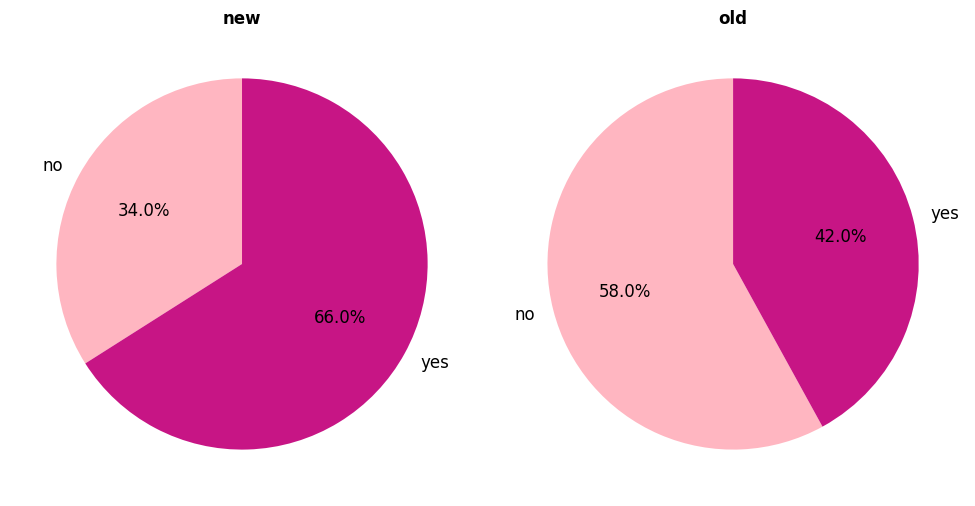

In [ ]:
cross_tab = pd.crosstab(df['landing_page'], df['converted'])
#values=df['count'], aggfunc='sum', normalize='index'

# Subplots para for the graphs
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Graph for "new"
ax[0].pie(
    cross_tab.loc['new'],
    labels=cross_tab.columns,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#FFB6C1", "#C71585" ]
)
ax[0].set_title("new", fontweight='bold')

for autotext in ax[0].texts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('normal')

# Graph for "old"
ax[1].pie(
    cross_tab.loc['old'],
    labels=cross_tab.columns,
    autopct='%1.1f%%',
    startangle=90,
    colors=["#FFB6C1", "#C71585"]
)

ax[1].set_title("old", fontweight='bold')


for autotext in ax[1].texts:
    autotext.set_color('black')
    autotext.set_fontsize(12)
    autotext.set_fontweight('normal')

plt.tight_layout()
plt.show()

There's more percentage of users converted than no converted on the new page, compared to the old page, where there's more not converted than converted users.

###Step 1: Define the null and alternate hypothesis

$H_0: p_1 = p_2$ \\
$H_a: p_1 < p_2$

###Step 2: Select Appropiate test

One population: one proportion z-test

###Step 3: Decide the significance level

$\alpha = 0.05$

###Step 4: Collect and prepare data

In [ ]:
control_converted = df[df['converted'] == 'yes']['group'].value_counts()['control']
treatment_converted = df[df['converted'] == 'yes']['group'].value_counts()['treatment']

users_control = df.group.value_counts()['control']
users_treatment = df.group.value_counts()['treatment']

print("From", users_control, "users in the control group,", control_converted, "users were converted. \nFrom", users_treatment, "users in the treatment group,", treatment_converted, "users were converted.")

From 50 users in the control group, 21 users were converted. 
From 50 users in the treatment group, 33 users were converted.


In [ ]:
p_control=control_converted/users_control
p_treatment=treatment_converted/users_treatment

print('The conversion rate for the control group is', round(p_control,4))
print('The conversion rate for the treatment group is', round(p_treatment,4))

The conversion rate for the control group is 0.42
The conversion rate for the treatment group is 0.66


###Step 5: Calculate the p-value

In [ ]:
from statsmodels.stats.proportion import proportions_ztest

test_stat, p_value = proportions_ztest([control_converted], [users_control], value=0.66, alternative='smaller')
print('The p-value is ' ,  round(p_value[0],5))

The p-value is  0.00029


###Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print("p-value is", round(p_value[0],5) ,"(less than 0.05) which means the null hypothesis is rejected.")
else:
    print("p-value is", round(p_value[0],5), "(greater than 0.05) which means we Fail to reject the null hypothesis.")

p-value is 0.00029 (less than 0.05) which means the null hypothesis is rejected.


###Step 7: Draw inference

There's enough evidence to say that treatment users have got subscribed on the new landing page more than the control users have. We can be more than 99% sure of this conclusion.

## 3. Are the conversion and preferred language, independent or related?

###Perform Visual Analysis

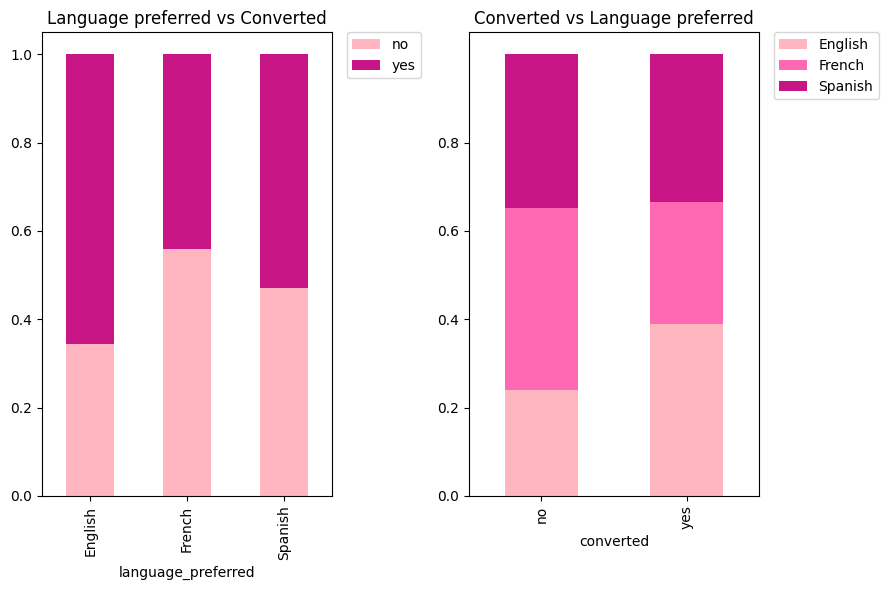

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(9, 6))


pd.crosstab(df['converted'],df['language_preferred'],normalize='index').plot(kind="bar", figsize=(9,6), stacked=True, color=["#FFB6C1", "#FF69B4", "#C71585"], ax=axes[1])
axes[1].set_title('Converted vs Language preferred')
axes[1].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)


pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(9,6), stacked=True, color=["#FFB6C1", "#C71585"], ax=axes[0])
axes[0].set_title('Language preferred vs Converted')
axes[0].legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.yticks(np.arange(0, 1, 0.2))
plt.tight_layout()
plt.show()


###Step 1: Define the null and alternate hypothesis

$H_0:$ Conversion is independent of preferred language\
$H_a:$ Conversion is related to preferred language

###Step 2: Select appropiate test

Chi-square test of independence

###Step 3: Decide the significance level

$\alpha$ = 0.05

###Step 4: Collect and prepare the data

In [ ]:
converted_language = pd.crosstab(df['converted'], df['language_preferred'])
sconverted_language = styled_cross_tab = cross_tab.style.set_properties(**{'border': '1px solid black',
                                                      'text-align': 'center', 'padding':'13px'})
sconverted_language

converted,no,yes
landing_page,,
new,17,33
old,29,21


###Step 5: Calculate the p-value

In [ ]:
from scipy.stats import chi2_contingency

chi, p_value, dof, exp_freq = chi2_contingency(converted_language)
print('The p-value is' , round(p_value, 2))

The p-value is 0.21


###Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print("p-value is", round(p_value,5) ,"(less than 0.05) which means the null hypothesis is rejected.        ")
else:
    print("p-value is", round(p_value,5), "(greater than 0.05) which means we Fail to reject the null hypothesis.")

p-value is 0.21299 (greater than 0.05) which means we Fail to reject the null hypothesis.


###Step 7: Draw inference

Null hypothesis said conversion is independent of preferred language and we fail to reject this hypothesis. \\
p-value is greater than 0.05, which means we fail to reject the null hypothesis. \\
But, I'm not more than 95% sure, I'm only 78% sure that conversion and preferred language are independent

## 4. Is the time spent on the new page same for the different language users?

###Perform Visual Analysis

In [ ]:
new_page_data = df[df['landing_page'] == 'new']
#Time mean for each language
time_spent_by_language = pd.crosstab(index=new_page_data['language_preferred'],
                                      columns=['time_spent_on_the_page'],
                                      values=new_page_data['time_spent_on_the_page'],
                                      aggfunc='mean')
time_spent_by_language

col_0,time_spent_on_the_page
language_preferred,
English,6.663750
French,6.196471
Spanish,5.835294


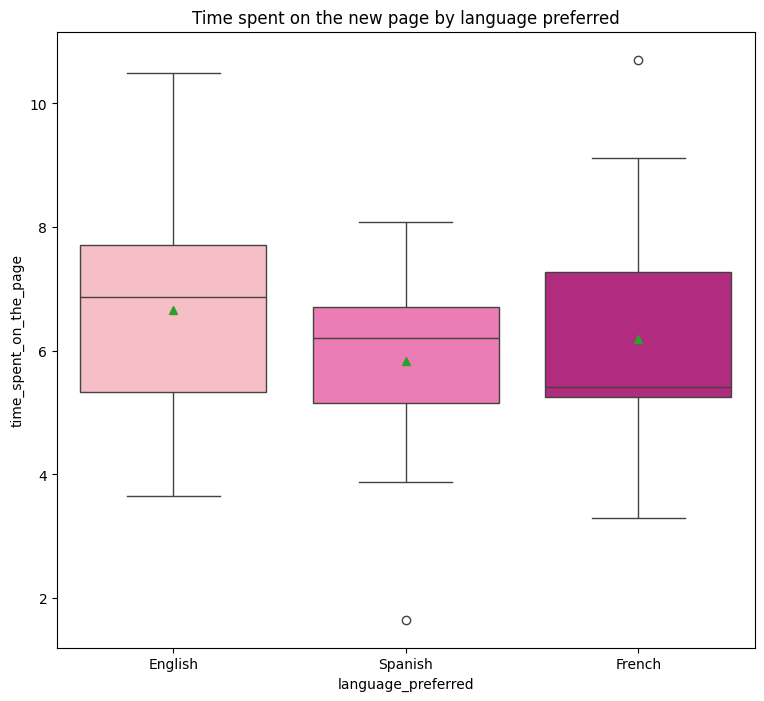

In [ ]:
my_colors = sns.color_palette(["#FFB6C1", "#FF69B4", "#C71585"])
plt.figure(figsize=(9,8))
sns.boxplot(x = new_page_data['language_preferred'], y = new_page_data['time_spent_on_the_page'], showmeans = True, palette = my_colors)
plt.title('Time spent on the new page by language preferred')
plt.show()


###Step 1: Define the null and alternate hypothesis

$H_0: \mu_1 = \mu_2 = \mu_3$   (Time spent on the new page mean is the same for different language users)\
$H_a:$ At least one language mean is different to the others


###Step 2: Select Appropiate test

One-way ANOVA f-test

###Step 3: Decide the significance level

$\alpha$ = 0.05

###Step 4: Collect and prepare the data

In [ ]:
#new_page_data = df[df['landing_page'] == 'new']
time_spanish = new_page_data[new_page_data['language_preferred']=='Spanish']['time_spent_on_the_page']
time_english = new_page_data[new_page_data['language_preferred']=='English']['time_spent_on_the_page']
time_french = new_page_data[new_page_data['language_preferred']=='French']['time_spent_on_the_page']

print("Spanish mean:", round(time_spanish.std(), 2),
      "\nEnglish mean:", round(time_english.std(), 2),
      "\nFrench mean:", round(time_english.std(),2))

Spanish mean: 1.53 
English mean: 1.98 
French mean: 1.98


###Step 5: Calculate the p-value

In [ ]:
from scipy import stats

test_stat, p_value = stats.f_oneway(time_spanish, time_english, time_french)
print('The p-value is', round(p_value, 2))

The p-value is 0.43


###Step 6: Compare the p-value with $\alpha$

In [ ]:
if p_value < 0.05:
    print("p-value is", round(p_value,2) ,"(less than 0.05) which means the null hypothesis is rejected.")
else:
    print("p-value is", round(p_value,2), "(greater than 0.05) which means we Fail to reject the null hypothesis.")

p-value is 0.43 (greater than 0.05) which means we Fail to reject the null hypothesis.


###Draw inference

Since p-value of the test is very large, we fail to reject the null hypothesis, which said that all the means for the time spent on the page for different languages were the same. So

## Conclusion and Business Recommendations

- According to the analysis, there's evidence that proves the fact that the new  landing page has been more effective with getting customers attention compared to the old one, considering that the audience has spent longest periods of time on the page. This has also represented an increase of new subscribers for the page.
- The English language on the new landing page is where the audience spend the longest periods of time but they don't get subscribed as in the French language they do.

I would recommend continuing this comparison of the page and then conducting another analysis to compare the updated data with the new results.


